In [3]:
import os
import pandas as pd
import wrds
from sqlalchemy import text
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ishaanpoojari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ishaanpoojari/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [4]:
db = wrds.Connection(wrds_username='user2294')

Loading library list...
Done


In [5]:
# Define the directory containing CSV files
directory = 'Quarterly_Segregated'

# Initialize an empty list to store dataframes
dfs = []

# Loop through each file in the directory
for root, dirs, files in os.walk(directory):
    for file in files:
        # Check if the file is a CSV
        if file.endswith('.csv'):
            # Construct the full path to the CSV file
            file_path = os.path.join(root, file)
            # Read the CSV into a dataframe and append it to the list
            df = pd.read_csv(file_path)
            dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

#kCBF.zEqH5*,6:c


In [6]:
df = combined_df
df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id
0,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",J C Penney Company Inc,CPPRQ,2011-03-31,SH,34919071.0,1.253944e+09,34919071.0,1.128235e+09,21.9317,19.3034,1,1,0.000000,NaN,CONSUMER DISCRETIONARY,338
1,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",General Growth Properties Inc. (DE),GGP,2011-03-31,SH,71802853.0,1.111509e+09,69965786.0,1.083070e+09,19.4404,18.5306,2,2,2.625665,addition,REAL ESTATE,230
2,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Beam Inc,BEAM,2011-03-31,SH,16668636.0,1.031622e+09,16668636.0,1.004286e+09,18.0432,17.1827,3,3,0.000000,NaN,CONSUMER DISCRETIONARY,503
3,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Mondelez International Inc. (Kraft Foods),MDLZ,2011-03-31,SH,22239265.0,6.974230e+08,19470089.0,6.135020e+08,12.1980,10.4966,4,5,14.222719,addition,CONSUMER STAPLES,3785
4,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Citigroup Inc.,C,2011-03-31,SH,14670777.7,6.484480e+08,14651428.7,6.930130e+08,11.3414,11.8570,5,4,0.132062,addition,FINANCE,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111092,ICAHN CARL C,Take-Two Interactive Software Inc.,TTWO,2010-09-30,SH,2461124.0,2.495600e+07,2357844.0,2.122100e+07,0.4511,0.4534,12,8,4.380273,addition,INFORMATION TECHNOLOGY,3930
111093,ICAHN CARL C,Dynegy Inc. (DE) Class A,DYNIQ,2010-09-30,SH,2399999.0,1.168800e+07,0.0,0.000000e+00,0.2113,NaN,13,999999,NaN,new,UTILITIES AND TELECOMMUNICATIONS,4078
111094,ICAHN CARL C,Enzon Pharmaceuticals Inc,ENZN,2010-09-30,SH,704214.0,7.922000e+06,704214.0,7.500000e+06,0.1432,0.1602,14,12,0.000000,NaN,HEALTH CARE,6903
111095,ICAHN CARL C,Lions Gate Entertainment Corp,LGF,2010-09-30,PRN,316600.0,3.100000e+05,316600.0,3.070000e+05,0.0056,0.0066,15,13,0.000000,NaN,CONSUMER DISCRETIONARY,679


In [7]:
tickers_list = df['Stock Ticker'].unique().tolist()
dates = df["Quarter Date"].unique().tolist()


# Join formatted dates into a string for SQL query
sql_date_string = ', '.join([f"'{date}'" for date in dates])
sql_ticker_string = ', '.join([f"'{ticker}'" for ticker in tickers_list])


In [8]:
query = f"""
SELECT b.date, a.ticker, b.shrout
FROM crsp.dse a
LEFT JOIN crsp.msf b ON a.cusip = b.cusip
WHERE a.ticker IN ({sql_ticker_string}) AND b.date IN ({sql_date_string})
"""

data_df = db.raw_sql(query)
data_df

,date,ticker,shrout
0,2023-06-30,JJSF,19270.0
1,2023-03-31,JJSF,19252.0
2,2022-09-30,JJSF,19219.0
3,2022-06-30,JJSF,19184.0
4,2022-03-31,JJSF,19173.0
...,...,...,...
381440,2011-03-31,CALX,45182.0
381441,2010-12-31,CALX,38538.0
381442,2010-09-30,CALX,37341.0
381443,2010-06-30,CALX,37339.0


In [9]:
data_df.rename(columns={'date': 'Quarter Date', 'ticker': 'Stock Ticker'}, inplace=True)

In [10]:
# Convert 'Quarter Date' column to datetime type
data_df['Quarter Date'] = pd.to_datetime(data_df['Quarter Date'])

# Ensure the 'Stock Ticker' column values are of string type
data_df['Stock Ticker'] = data_df['Stock Ticker'].astype(str)

df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
# Ensure the 'Stock Ticker' column values are of string type
df['Stock Ticker'] = df['Stock Ticker'].astype(str)
data_df.dropna(subset=['Quarter Date', 'Stock Ticker'], inplace=True)
df.dropna(subset=['Quarter Date', 'Stock Ticker'], inplace=True)
data_df.drop_duplicates(inplace=True)

In [11]:
df[(df['Quarter Date'] ==  '2008-03-31') & (df['Stock Ticker'] == 'JJSF')]


,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id
82938,SOROS FUND MANAGEMENT LLC,J & J Snack Foods Corp.,JJSF,2008-03-31,SH,8639.0,237000.0,0.0,0.0,0.011,NaN,315,999999,NaN,new,CONSUMER STAPLES,2743


In [12]:
data_df[(data_df['Quarter Date'] ==  '2008-03-31') & (data_df['Stock Ticker'] == 'JJSF')]


,Quarter Date,Stock Ticker,shrout
46,2008-03-31,JJSF,18676.0


In [13]:
merged_df = pd.merge(df, data_df, on=['Quarter Date', 'Stock Ticker'], how='left')

In [14]:
non_nan_rows = merged_df[merged_df['shrout'].notna()]


In [15]:
cleaned_df = non_nan_rows.copy()

In [16]:
cleaned_df['Price'] = cleaned_df['Current Market Value'] / cleaned_df['Current Shares Held']

In [17]:
cleaned_df['Company Market Value'] =  cleaned_df['shrout'] * cleaned_df['Price']

In [18]:
cleaned_df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,Previous % of Portfolio,Current Rank,Previous Rank,Change in Shares,Type of Change,Sector,stock_id,shrout,Price,Company Market Value
1,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",General Growth Properties Inc. (DE),GGP,2011-03-31,SH,71802853.0,1.111509e+09,69965786.0,1.083070e+09,19.4404,18.5306,2,2,2.625665,addition,REAL ESTATE,230,964138.0,15.480012,1.492487e+07
2,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Beam Inc,BEAM,2011-03-31,SH,16668636.0,1.031622e+09,16668636.0,1.004286e+09,18.0432,17.1827,3,3,0.000000,NaN,CONSUMER DISCRETIONARY,503,153646.0,61.890007,9.509152e+06
3,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Mondelez International Inc. (Kraft Foods),MDLZ,2011-03-31,SH,22239265.0,6.974230e+08,19470089.0,6.135020e+08,12.1980,10.4966,4,5,14.222719,addition,CONSUMER STAPLES,3785,1748927.0,31.359984,5.484632e+07
4,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Citigroup Inc.,C,2011-03-31,SH,14670777.7,6.484480e+08,14651428.7,6.930130e+08,11.3414,11.8570,5,4,0.132062,addition,FINANCE,216,29118575.0,44.199974,1.287040e+09
5,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Family Dollar Stores Inc.,FDO,2011-03-31,SH,5764187.0,2.958180e+08,0.0,0.000000e+00,5.1739,NaN,6,999999,NaN,new,CONSUMER DISCRETIONARY,2705,126386.0,51.319987,6.486128e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116817,ICAHN CARL C,Lawson Software Inc,LWSN,2010-09-30,SH,3289886.0,2.786500e+07,1902080.0,1.388500e+07,0.5037,0.2967,11,10,72.962546,addition,INFORMATION TECHNOLOGY,243,163054.0,8.469898,1.381051e+06
116818,ICAHN CARL C,Take-Two Interactive Software Inc.,TTWO,2010-09-30,SH,2461124.0,2.495600e+07,2357844.0,2.122100e+07,0.4511,0.4534,12,8,4.380273,addition,INFORMATION TECHNOLOGY,3930,84978.0,10.140082,8.616839e+05
116820,ICAHN CARL C,Enzon Pharmaceuticals Inc,ENZN,2010-09-30,SH,704214.0,7.922000e+06,704214.0,7.500000e+06,0.1432,0.1602,14,12,0.000000,NaN,HEALTH CARE,6903,59668.0,11.249421,6.712305e+05
116821,ICAHN CARL C,Lions Gate Entertainment Corp,LGF,2010-09-30,PRN,316600.0,3.100000e+05,316600.0,3.070000e+05,0.0056,0.0066,15,13,0.000000,NaN,CONSUMER DISCRETIONARY,679,136244.0,0.979154,1.334038e+05


In [19]:

# Group by 'Filer Name' and 'Quarter Date'
grouped = cleaned_df.groupby(['Filer Name', 'Quarter Date'])

# Iterate over each group
for group_name, group_data in grouped:

    # Total Market Value of stocks held by that manager in that quarter
    total_market_value = group_data['Company Market Value'].sum()
    
    # Calculate weights based on market value
    group_data['Weight'] = group_data['Company Market Value'] / total_market_value
    
    # Adjust shares based on weights
    group_data['Adjusted Shares'] = group_data['Weight'] * group_data['Current Shares Held']
    
    # Calculate the new portfolio market value held
    group_data['New Portfolio Market Value'] = group_data['Adjusted Shares'] * group_data['Price']
    
    # Calculate the weight difference
    group_data['Weight Difference'] = group_data['Weight'] - (group_data['New Portfolio Market Value'] / group_data['New Portfolio Market Value'].sum())
    
    # Update DataFrame with adjusted shares
    cleaned_df.loc[group_data.index, 'Adjusted Shares'] = group_data['Adjusted Shares']
    cleaned_df.loc[group_data.index, 'New Portfolio Market Value'] = group_data['New Portfolio Market Value']
    cleaned_df.loc[group_data.index, 'Weight'] = group_data['Weight']
    cleaned_df.loc[group_data.index, 'Weight Difference'] = group_data['Weight Difference']

In [20]:
cleaned_df

,Filer Name,Stock Name,Stock Ticker,Quarter Date,Type of Security,Current Shares Held,Current Market Value,Previous Shares Held,Previous Market Value,Current % of Portfolio,...,Type of Change,Sector,stock_id,shrout,Price,Company Market Value,Adjusted Shares,New Portfolio Market Value,Weight,Weight Difference
1,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",General Growth Properties Inc. (DE),GGP,2011-03-31,SH,71802853.0,1.111509e+09,69965786.0,1.083070e+09,19.4404,...,addition,REAL ESTATE,230,964138.0,15.480012,1.492487e+07,7.763530e+05,1.201795e+07,0.010812,-0.007572
2,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Beam Inc,BEAM,2011-03-31,SH,16668636.0,1.031622e+09,16668636.0,1.004286e+09,18.0432,...,NaN,CONSUMER DISCRETIONARY,503,153646.0,61.890007,9.509152e+06,1.148283e+05,7.106724e+06,0.006889,-0.003982
3,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Mondelez International Inc. (Kraft Foods),MDLZ,2011-03-31,SH,22239265.0,6.974230e+08,19470089.0,6.135020e+08,12.1980,...,addition,CONSUMER STAPLES,3785,1748927.0,31.359984,5.484632e+07,8.836393e+05,2.771091e+07,0.039733,-0.002656
4,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Citigroup Inc.,C,2011-03-31,SH,14670777.7,6.484480e+08,14651428.7,6.930130e+08,11.3414,...,addition,FINANCE,216,29118575.0,44.199974,1.287040e+09,1.367894e+07,6.046087e+08,0.932393,0.007526
5,"PERSHING SQUARE CAPITAL MANAGEMENT, L.P.",Family Dollar Stores Inc.,FDO,2011-03-31,SH,5764187.0,2.958180e+08,0.0,0.000000e+00,5.1739,...,new,CONSUMER DISCRETIONARY,2705,126386.0,51.319987,6.486128e+06,2.708511e+04,1.390008e+06,0.004699,0.002573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116817,ICAHN CARL C,Lawson Software Inc,LWSN,2010-09-30,SH,3289886.0,2.786500e+07,1902080.0,1.388500e+07,0.5037,...,addition,INFORMATION TECHNOLOGY,243,163054.0,8.469898,1.381051e+06,2.402276e+04,2.034703e+05,0.007302,0.006811
116818,ICAHN CARL C,Take-Two Interactive Software Inc.,TTWO,2010-09-30,SH,2461124.0,2.495600e+07,2357844.0,2.122100e+07,0.4511,...,addition,INFORMATION TECHNOLOGY,3930,84978.0,10.140082,8.616839e+05,1.121279e+04,1.136986e+05,0.004556,0.004281
116820,ICAHN CARL C,Enzon Pharmaceuticals Inc,ENZN,2010-09-30,SH,704214.0,7.922000e+06,704214.0,7.500000e+06,0.1432,...,NaN,HEALTH CARE,6903,59668.0,11.249421,6.712305e+05,2.499244e+03,2.811505e+04,0.003549,0.003481
116821,ICAHN CARL C,Lions Gate Entertainment Corp,LGF,2010-09-30,PRN,316600.0,3.100000e+05,316600.0,3.070000e+05,0.0056,...,NaN,CONSUMER DISCRETIONARY,679,136244.0,0.979154,1.334038e+05,2.233117e+02,2.186564e+02,0.000705,0.000705


In [21]:
def identify_strong_conviction_managers(df):
    # Convert 'Quarter Date' to datetime if it's not already in datetime format
    df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
    
    # Extract year from 'Quarter Date'
    df['Year'] = df['Quarter Date'].dt.year
    
    # Group by 'Filer Name' and 'Year'
    grouped = df.groupby(['Filer Name', 'Year'])
    
    # Calculate median portfolio tilt (weight difference) for each manager within each year
    median_tilt = grouped['Weight Difference'].median()
    
    # Determine the top 30th percentile of managers based on median portfolio tilt
    top_30_percentile = median_tilt.groupby(level='Year').apply(lambda x: x.quantile(0.7))
    
    # Identify managers who fall into the top 30th percentile for each year
    strong_conviction_managers = {}
    for year, tilt_threshold in top_30_percentile.items():
        year_mask = df['Year'] == year
        year_df = df[year_mask]
        year_grouped = year_df.groupby('Filer Name')['Weight Difference'].median()
        strong_managers = year_grouped[year_grouped >= tilt_threshold].index.tolist()
        strong_conviction_managers[year] = strong_managers
    
    return strong_conviction_managers

# Call the function with your DataFrame
strong_conviction_managers = identify_strong_conviction_managers(cleaned_df)


In [22]:
strong_conviction_managers

{2001: ['APPALOOSA LP', 'BERKSHIRE HATHAWAY INC', 'THIRD POINT LLC'],
 2002: ['APPALOOSA LP', 'BERKSHIRE HATHAWAY INC', 'THIRD POINT LLC'],
 2003: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'FARALLON CAPITAL MANAGEMENT LLC',
  'ICAHN CARL C'],
 2004: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'ICAHN CARL C'],
 2005: ['BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'ICAHN CARL C',
  'THIRD POINT LLC'],
 2006: ['APPALOOSA LP',
  'BERKSHIRE HATHAWAY INC',
  'GREENLIGHT CAPITAL INC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2007: ['BERKSHIRE HATHAWAY INC',
  'ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2008: ['ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.',
  'TIGER GLOBAL MANAGEMENT LLC'],
 2009: ['APPALOOSA LP',
  'ICAHN CARL C',
  'LONE PINE CAPITAL LLC',
  'PERSHING SQUARE CAPITAL MANAGEMENT, L.P.'],
 2010: ['APPALOOSA LP',
  'ICAHN CARL C',
  'PERSHI

In [23]:
def calculate_median_portfolio_tilt(df):
    # Convert 'Quarter Date' to datetime if it's not already in datetime format
    df['Quarter Date'] = pd.to_datetime(df['Quarter Date'])
    
    # Extract year from 'Quarter Date'
    df['Year'] = df['Quarter Date'].dt.year
    
    # Group by 'Filer Name' and 'Year'
    grouped = df.groupby(['Filer Name', 'Year'])
    
    # Calculate median portfolio tilt (weight difference) for each manager within each year
    median_tilt = grouped['Weight Difference'].median()
    
    return median_tilt

# Call the function with your DataFrame
median_portfolio_tilt = calculate_median_portfolio_tilt(cleaned_df)

In [24]:
display(median_portfolio_tilt)

Filer Name                   Year
APPALOOSA LP                 2001    0.006666
                             2002    0.009665
                             2003    0.003499
                             2004    0.003401
                             2005    0.000067
                                       ...   
TRIAN FUND MANAGEMENT, L.P.  2019    0.002762
                             2020    0.002304
                             2021   -0.002067
                             2022   -0.044290
                             2023   -0.006611
Name: Weight Difference, Length: 321, dtype: float64

In [25]:
print(pd.__version__)
sns.__version__
import sys
print(sys.executable)

2.2.2
/Users/ishaanpoojari/opt/anaconda3/bin/python


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

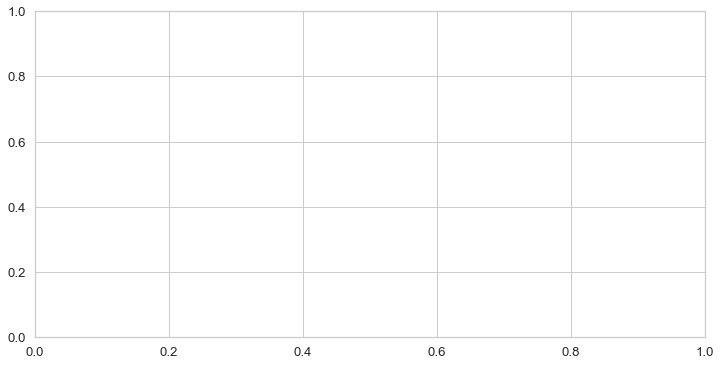

In [26]:
import numpy as np

median_portfolio_tilt.replace([np.inf, -np.inf], np.nan, inplace=True)


# Reset index to access 'Filer Name' and 'Year' as columns
median_portfolio_tilt = median_portfolio_tilt.reset_index()

# Set style and font scale
sns.set(style="whitegrid", font_scale=1.2)

# Create separate plots for each manager
for manager in median_portfolio_tilt['Filer Name'].unique():
    plt.figure(figsize=(12, 6))
    manager_data = median_portfolio_tilt[median_portfolio_tilt['Filer Name'] == manager]
    sns.lineplot(data=manager_data, x="Year", y="Weight Difference", marker='o', markersize=8, linewidth=2)
    plt.title(f"Median Portfolio Tilt for {manager}")
    plt.xlabel("Year")
    plt.ylabel("Median Portfolio Tilt")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [27]:
def identify_top_and_lowest_percentile_stocks(df, percentile):
    # Group by 'Quarter Date'
    grouped = df.groupby('Quarter Date')
    
    # Initialize empty dictionaries to store top and lowest percentile stocks
    top_percentile_stocks = {}
    lowest_percentile_stocks = {}
    
    # Iterate over each quarter
    for quarter_date, quarter_data in grouped:
        # Calculate portfolio tilt (weight difference) for each stock within the quarter
        quarter_data['Portfolio Tilt'] = quarter_data['Weight Difference']
        
        # Identify the top and lowest 30th percentile of stocks based on their portfolio tilt
        top_th_percentile = quarter_data.nlargest(int(len(quarter_data) * percentile), 'Portfolio Tilt')['Stock Ticker'].tolist()
        lowest_th_percentile = quarter_data.nsmallest(int(len(quarter_data) * percentile), 'Portfolio Tilt')['Stock Ticker'].tolist()
        
        # Store the lists of stocks for each quarter
        top_percentile_stocks[quarter_date] = top_th_percentile
        lowest_percentile_stocks[quarter_date] = lowest_th_percentile
    
    return top_percentile_stocks, lowest_percentile_stocks

# Call the function with your DataFrame
top_percentile_stocks, lowest_percentile_stocks = identify_top_and_lowest_percentile_stocks(cleaned_df, 0.1)
selectedStocks = {}
# Display the results
print("Top 10th percentile of stocks in each quarter based on portfolio tilt:")
for quarter_date, stocks in top_percentile_stocks.items():
    print(f"{quarter_date}: {stocks}")
    selectedStocks[quarter_date] = stocks

print("\nLowest 10th percentile of stocks in each quarter based on portfolio tilt:")
for quarter_date, stocks in lowest_percentile_stocks.items():
    print(f"{quarter_date}: {stocks}")


Top 10th percentile of stocks in each quarter based on portfolio tilt:
2001-12-31 00:00:00: ['C', 'NXTL', 'TWX', 'EIX', 'LNC', 'FE', 'ELN', 'T', 'T', 'PVN', 'IBM', 'PVN', 'COST', 'VIAV', 'PFE', 'TGNA', 'HD', 'STI', 'FCEL', 'SFE', 'MRK', 'AKAM', 'FDC', 'DD', 'CEM', 'BEV', 'GPS', 'NEOL', 'FE', 'INTC', 'WFC', 'JAVA', 'MO', 'EVRG', 'INTC', 'DD', 'DELL', 'CCI', 'FALC', 'ITWO', 'BLS', 'DOV', 'MTB', 'VIAV', 'SGP', 'DNB', 'ITWO', 'SILI', 'PARA', 'PACW', 'DD', 'TXN', 'DIS', 'ODP', 'TT', 'JNY', 'JPM', 'MCD', 'AWE', 'NHI', 'PARA', 'HRB', 'BA', 'WPO', 'PVN', 'G', 'TZH', 'CMTN', 'DNB', 'AMAT', 'OSI', 'QQQ', 'Q', 'XLNX', 'PAYX', 'ALL', 'MCO', 'TGT', 'GL', 'GPS', 'MXIM', 'CRAY', 'WM']
2002-09-30 00:00:00: ['WINT', 'C', 'C', 'T', 'T', 'AIG', 'PCG', 'INTC', 'PFE', 'ADP', 'TGNA', 'BKS', 'STI', 'ETS', 'COST', 'CSCO', 'FRTX', 'INTC', 'FALC', 'DIS', 'JNJ', 'MCD', 'AMAT', 'S', 'FRTX', 'BEV', 'MDC', 'SGP', 'GPS', 'SPY', 'ACF', 'SILI', 'MO', 'WFC', 'TXN', 'POG', 'LVLT', 'KRB', 'MRK', 'PACW', 'MTB', 'RTN', 'OD

In [28]:
top_percentile_stocks

{Timestamp('2001-12-31 00:00:00'): ['C',
  'NXTL',
  'TWX',
  'EIX',
  'LNC',
  'FE',
  'ELN',
  'T',
  'T',
  'PVN',
  'IBM',
  'PVN',
  'COST',
  'VIAV',
  'PFE',
  'TGNA',
  'HD',
  'STI',
  'FCEL',
  'SFE',
  'MRK',
  'AKAM',
  'FDC',
  'DD',
  'CEM',
  'BEV',
  'GPS',
  'NEOL',
  'FE',
  'INTC',
  'WFC',
  'JAVA',
  'MO',
  'EVRG',
  'INTC',
  'DD',
  'DELL',
  'CCI',
  'FALC',
  'ITWO',
  'BLS',
  'DOV',
  'MTB',
  'VIAV',
  'SGP',
  'DNB',
  'ITWO',
  'SILI',
  'PARA',
  'PACW',
  'DD',
  'TXN',
  'DIS',
  'ODP',
  'TT',
  'JNY',
  'JPM',
  'MCD',
  'AWE',
  'NHI',
  'PARA',
  'HRB',
  'BA',
  'WPO',
  'PVN',
  'G',
  'TZH',
  'CMTN',
  'DNB',
  'AMAT',
  'OSI',
  'QQQ',
  'Q',
  'XLNX',
  'PAYX',
  'ALL',
  'MCO',
  'TGT',
  'GL',
  'GPS',
  'MXIM',
  'CRAY',
  'WM'],
 Timestamp('2002-09-30 00:00:00'): ['WINT',
  'C',
  'C',
  'T',
  'T',
  'AIG',
  'PCG',
  'INTC',
  'PFE',
  'ADP',
  'TGNA',
  'BKS',
  'STI',
  'ETS',
  'COST',
  'CSCO',
  'FRTX',
  'INTC',
  'FALC',
  'DIS',

In [29]:
selectedStocks

{Timestamp('2001-12-31 00:00:00'): ['C',
  'NXTL',
  'TWX',
  'EIX',
  'LNC',
  'FE',
  'ELN',
  'T',
  'T',
  'PVN',
  'IBM',
  'PVN',
  'COST',
  'VIAV',
  'PFE',
  'TGNA',
  'HD',
  'STI',
  'FCEL',
  'SFE',
  'MRK',
  'AKAM',
  'FDC',
  'DD',
  'CEM',
  'BEV',
  'GPS',
  'NEOL',
  'FE',
  'INTC',
  'WFC',
  'JAVA',
  'MO',
  'EVRG',
  'INTC',
  'DD',
  'DELL',
  'CCI',
  'FALC',
  'ITWO',
  'BLS',
  'DOV',
  'MTB',
  'VIAV',
  'SGP',
  'DNB',
  'ITWO',
  'SILI',
  'PARA',
  'PACW',
  'DD',
  'TXN',
  'DIS',
  'ODP',
  'TT',
  'JNY',
  'JPM',
  'MCD',
  'AWE',
  'NHI',
  'PARA',
  'HRB',
  'BA',
  'WPO',
  'PVN',
  'G',
  'TZH',
  'CMTN',
  'DNB',
  'AMAT',
  'OSI',
  'QQQ',
  'Q',
  'XLNX',
  'PAYX',
  'ALL',
  'MCO',
  'TGT',
  'GL',
  'GPS',
  'MXIM',
  'CRAY',
  'WM'],
 Timestamp('2002-09-30 00:00:00'): ['WINT',
  'C',
  'C',
  'T',
  'T',
  'AIG',
  'PCG',
  'INTC',
  'PFE',
  'ADP',
  'TGNA',
  'BKS',
  'STI',
  'ETS',
  'COST',
  'CSCO',
  'FRTX',
  'INTC',
  'FALC',
  'DIS',

In [34]:
import json
import pickle

# with open('StockUniverse1.json', 'w') as json_file:
#     json.dump(selectedStocks, json_file)
with open('StockUniverse1.pkl', 'wb') as f:
    pickle.dump(selectedStocks, f)

In [ ]:
def momentum_function(df, quarter_date):
    # Calculate the start date of the quarter
    quarter_start_date = quarter_date - pd.offsets.QuarterBegin(startingMonth=1)

    # Convert Timestamps to strings for the SQL query
    start_date_str = quarter_start_date.strftime('%Y-%m-%d')
    end_date_str = quarter_date.strftime('%Y-%m-%d')

    # Initialize a dictionary to store momentum values for each stock
    momentum_values = {}

    # Fetch and calculate momentum for each stock in the universe for the given quarter
    for ticker in top_percentile_stocks[quarter_date]:
        # Fetch daily returns from WRDS
        query = f"""
        SELECT a.date, a.ret
        FROM crsp.dsf a
        INNER JOIN crsp.dsenames AS b ON a.permno = b.permno
        WHERE b.ticker = '{ticker}' AND a.date BETWEEN '{start_date_str}' AND '{end_date_str}'
        AND b.namedt <= a.date AND a.date <= b.nameendt
        """
        data = db.raw_sql(query)
        
        # Ensure the 'ret' column is numeric and replace inf/nan if necessary
        data['ret'] = pd.to_numeric(data['ret'], errors='coerce').fillna(0)
        
        # Calculate cumulative return for the quarter as momentum
        momentum = (1 + data['ret']).prod() - 1
        
        momentum_values[ticker] = momentum

    return momentum_values


stock_momentums = momentum_function(cleaned_df, pd.Timestamp('2023-06-30 00:00:00'))
# Make an map where k is the quarter and the value is a list of tuple with ticker and momentum - will need to modify the function to return list of tuples for each stock

OperationalError: (psycopg2.OperationalError) server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

[SQL: 
        SELECT a.date, a.ret
        FROM crsp.dsf a
        INNER JOIN crsp.dsenames AS b ON a.permno = b.permno
        WHERE b.ticker = 'AAPL' AND a.date BETWEEN '2023-04-01' AND '2023-06-30'
        AND b.namedt <= a.date AND a.date <= b.nameendt
        ]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
stock_momentums

NameError: name 'stock_momentums' is not defined

In [ ]:
# tickers = top_percentile_stocks[pd.Timestamp('2001-12-31 00:00:00')] 
# ticker_str = "', '".join(tickers)

# query = f"""
# SELECT dsf.date, dsf.permno, dsf.ret, dsenames.ticker
# FROM crsp.dsf dsf
# INNER JOIN crsp.dsenames dsenames ON dsf.permno = dsenames.permno
# WHERE dsenames.ticker IN ('{ticker_str}')
# AND dsf.date >= '2001-12-31' AND dsf.date <= '2002-09-30'
# AND dsenames.namedt <= dsf.date AND dsf.date <= dsenames.nameendt
# """

# data = db.raw_sql(query)
# data['date'] = pd.to_datetime(data['date'])

In [ ]:
initial_holdings = top_percentile_stocks[pd.Timestamp('2001-12-31 00:00:00')] 
initial_holdings

['C',
 'NXTL',
 'TWX',
 'EIX',
 'LNC',
 'FE',
 'ELN',
 'T',
 'T',
 'PVN',
 'IBM',
 'PVN',
 'COST',
 'VIAV',
 'PFE',
 'TGNA',
 'HD',
 'STI',
 'FCEL',
 'SFE',
 'MRK',
 'AKAM',
 'FDC',
 'DD',
 'CEM',
 'BEV',
 'GPS',
 'NEOL',
 'FE',
 'INTC',
 'WFC',
 'JAVA',
 'MO',
 'EVRG',
 'INTC',
 'DD',
 'DELL',
 'CCI',
 'FALC',
 'ITWO',
 'BLS',
 'DOV',
 'MTB',
 'VIAV',
 'SGP',
 'DNB',
 'ITWO',
 'SILI',
 'PARA',
 'PACW',
 'DD',
 'TXN',
 'DIS',
 'ODP',
 'TT',
 'JNY',
 'JPM',
 'MCD',
 'AWE',
 'NHI',
 'PARA',
 'HRB',
 'BA',
 'WPO',
 'PVN',
 'G',
 'TZH',
 'CMTN',
 'DNB',
 'AMAT',
 'OSI',
 'QQQ',
 'Q',
 'XLNX',
 'PAYX',
 'ALL',
 'MCO',
 'TGT',
 'GL',
 'GPS',
 'MXIM',
 'CRAY',
 'WM']

In [ ]:
ticker_str = "', '".join(initial_holdings)

query = f"""
SELECT a.date, b.ticker, a.ret
FROM crsp.dsf AS a
JOIN crsp.dsenames AS b ON a.permno = b.permno
WHERE b.ticker IN ('{ticker_str}')
AND a.date >= '2001-12-31' AND a.date <= '2005-12-31'
AND b.namedt <= a.date AND a.date <= b.nameendt
ORDER BY a.date, b.ticker;
"""

data = db.raw_sql(query)
# data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)
# data.pivot(columns='ticker', values='ret').fillna(0, inplace=True)
data['date'] = pd.to_datetime(data['date'])
pivot_data = data.pivot(index='date', columns='ticker', values='ret').fillna(0)

In [ ]:
data

,date,ticker,ret
0,2001-12-31,AKAM,-0.010000
1,2001-12-31,ALL,-0.004725
2,2001-12-31,AMAT,-0.040899
3,2001-12-31,AWE,-0.015079
4,2001-12-31,BA,-0.008184
...,...,...,...
62195,2005-12-30,TXN,-0.010491
62196,2005-12-30,WFC,-0.003647
62197,2005-12-30,WM,-0.004121
62198,2005-12-30,WPO,0.000000


In [ ]:
pivot_data

ticker,AKAM,ALL,AMAT,AWE,BA,BEV,BLS,C,CCI,CEM,...,T,TGT,TT,TWX,TXN,TZH,WFC,WM,WPO,XLNX
date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,-0.010000,-0.004725,-0.040899,-0.015079,-0.008184,-0.011494,-0.015484,-0.013870,-0.002801,0.003349,...,-0.002200,-0.004849,0.027190,0.000000,-0.023029,0.000637,-0.002982,0.005535,-0.011618,-0.047561
2002-01-02,-0.011785,-0.015134,0.039152,0.004871,-0.017535,-0.052326,0.030144,0.010499,0.029963,0.000417,...,0.030871,-0.001218,-0.009804,0.000000,0.029286,0.004459,-0.000690,-0.007034,-0.003434,0.064021
2002-01-03,0.039182,-0.018379,0.091673,0.001385,0.017060,0.000000,0.017812,0.000784,0.044545,-0.002919,...,-0.003209,0.003659,-0.010891,0.000000,0.065233,0.024096,0.003683,-0.007083,0.010072,0.097473
2002-01-04,0.018033,0.003376,-0.005935,-0.056017,0.041548,0.036810,0.007500,0.018609,-0.029591,0.001673,...,-0.014485,0.019198,-0.002502,0.000000,-0.009772,-0.006192,0.002523,0.046216,-0.012596,0.002412
2002-01-07,-0.064412,0.011013,-0.010615,-0.018315,0.015857,-0.039053,-0.011166,-0.011731,-0.028700,-0.000835,...,0.005988,0.000238,0.008530,0.000000,-0.032566,0.001246,0.001601,0.013341,0.002790,-0.023846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-23,-0.016153,-0.003095,0.003819,0.000000,0.002384,0.006844,-0.001092,0.001017,0.008127,0.003915,...,0.002034,0.010191,0.000000,-0.001130,0.006418,0.000000,0.000781,0.007012,0.005219,-0.006526
2005-12-27,0.008458,-0.003835,-0.011413,0.000000,-0.013428,-0.006797,-0.003643,-0.011982,-0.017955,-0.011700,...,0.000000,0.001261,0.000000,-0.008484,-0.018524,0.000000,-0.006716,-0.002246,-0.004543,-0.015070
2005-12-28,0.001480,-0.001100,0.001099,0.000000,0.006097,0.007699,-0.001463,-0.003700,0.000373,0.000789,...,-0.000406,-0.000540,0.000000,-0.003993,0.012067,0.000000,-0.007075,-0.005403,-0.001786,-0.001569


In [ ]:
data.loc["2002-1-23"]

KeyError: '2002-1-23'

In [ ]:
print(data.dtypes)
print("Pivot data:")
print(pivot_data.dtypes)

allPivots = True
for col in pivot_data.columns:
    if pivot_data[col].dtype != 'float64':
        allPivots = False
if allPivots:
    print("All pivots are float64")
else:
    print("Not all pivots are float64")

date      datetime64[ns]
ticker            object
ret              float64
dtype: object
Pivot data:
ticker
AKAM    float64
ALL     float64
AMAT    float64
AWE     float64
BA      float64
         ...   
TZH     float64
WFC     float64
WM      float64
WPO     float64
XLNX    float64
Length: 66, dtype: object
All pivots are float64


In [ ]:

# Check for missing data
print(data.isna().sum())
print(data.head())  

date      0
ticker    0
ret       1
dtype: int64
        date ticker       ret
0 2001-12-31   AKAM -0.010000
1 2001-12-31    ALL -0.004725
2 2001-12-31   AMAT -0.040899
3 2001-12-31    AWE -0.015079
4 2001-12-31     BA -0.008184


In [ ]:
print(data.head())
print("Data shape:", data.shape)

        date ticker       ret
0 2001-12-31   AKAM -0.010000
1 2001-12-31    ALL -0.004725
2 2001-12-31   AMAT -0.040899
3 2001-12-31    AWE -0.015079
4 2001-12-31     BA -0.008184
Data shape: (62200, 3)


In [ ]:
from gym import Env
from gym.spaces import Box


class StockPortfolioEnv(Env):
    def __init__(self, df):
        super(StockPortfolioEnv, self).__init__()
        self.df = df
        self.n_assets = len(df.columns)
        self.action_space = Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(self.n_assets,), dtype=np.float32)
        self.initial_weights = np.array([1.0 / self.n_assets] * self.n_assets)

    def reset(self):
        self.current_step = 0
        self.portfolio_returns = []
        self.current_weights = self.initial_weights.copy()
        initial_obs = self.df.iloc[0].values
        return initial_obs.astype(np.float32)  

    def step(self, action):
        self.current_weights = action / np.sum(action)
        current_returns = self.df.iloc[self.current_step].values
        portfolio_return = np.dot(current_returns, self.current_weights)
        self.portfolio_returns.append(portfolio_return)

        sharpe_ratio = self.calculate_sharpe_ratio()

        reward = sharpe_ratio
        self.current_step += 1
        done = self.current_step >= len(self.df)-1
        next_obs = self.df.iloc[self.current_step % len(self.df)].values
        return next_obs.astype(np.float32), reward, done, {'sharpe_ratio': sharpe_ratio}  

    def calculate_sharpe_ratio(self):
        if len(self.portfolio_returns) > 1:
            mean_returns = np.mean(self.portfolio_returns)
            std_returns = np.std(self.portfolio_returns)
            if std_returns > 0:
                return mean_returns / std_returns
            else:
                return 0
        return 0

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Portfolio Returns: {self.portfolio_returns[-1] if self.portfolio_returns else 'N/A'}")
        print(f'Current Weights: {self.current_weights}')



In [ ]:
from stable_baselines3 import PPO

env = StockPortfolioEnv(pivot_data)

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

2024-04-28 15:46:27.991380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/ishaanpoojari/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.01e+03 |
|    ep_rew_mean     | 8.64     |
| time/              |          |
|    fps             | 1550     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.01e+03    |
|    ep_rew_mean          | 3.52        |
| time/                   |             |
|    fps                  | 1158        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016481698 |
|    clip_fraction        | 0.142       |
|    clip_range           | 0.2         |
|    entropy_loss         | -93.7       |
|    explained_variance   | -0.0243     |
|    learning_rate        | 0.

In [ ]:
def evaluate_model(env, model, print_each_quarter=True):
    obs = env.reset() 
    done = False
    total_days = len(env.df)
    quarterly_steps = total_days // 4
    all_rewards = []

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        all_rewards.append(reward)

        if (env.current_step + 1) % quarterly_steps == 0 or done:
            current_date = env.df.index[env.current_step]
            if print_each_quarter:
                print(f"Quarter Ending {current_date.strftime('%Y-%m-%d')}: Sharpe Ratio: {info['sharpe_ratio']:.4f}")
                print(f"End of Quarter Portfolio Weights: {env.current_weights}")  # Accessing weights directly from the environment
            if done:
                break

    initial_sharpe = all_rewards[0] if all_rewards else 0  # Safeguard against empty list
    final_sharpe = all_rewards[-1] if all_rewards else 0
    improvement = ((final_sharpe - initial_sharpe) / abs(initial_sharpe)) * 100 if initial_sharpe != 0 else 0
    print(f"Initial Sharpe Ratio: {initial_sharpe:.4f}, Final Sharpe Ratio: {final_sharpe:.4f}")
    print(f"Improvement in Sharpe Ratio: {improvement:.2f}%")

    return initial_sharpe, final_sharpe, improvement




In [ ]:
initial_sharpe, final_sharpe, improvement = evaluate_model(env, model)

Quarter Ending 2002-12-30: Sharpe Ratio: -0.0539
End of Quarter Portfolio Weights: [0.         0.04408831 0.         0.         0.         0.0409843
 0.         0.         0.06531654 0.01470484 0.01102757 0.0460314
 0.06398023 0.01466104 0.06042794 0.04210941 0.         0.
 0.         0.         0.         0.04432367 0.04368208 0.02381961
 0.04576731 0.0066566  0.00347633 0.         0.         0.02377553
 0.         0.02367199 0.         0.00627836 0.         0.
 0.         0.         0.01434746 0.05830643 0.         0.
 0.05861243 0.         0.04147395 0.         0.         0.00171141
 0.         0.         0.05821964 0.         0.         0.00705804
 0.         0.         0.         0.         0.         0.
 0.06453353 0.         0.         0.         0.         0.07095408]
Quarter Ending 2003-12-30: Sharpe Ratio: 0.0352
End of Quarter Portfolio Weights: [0.00806563 0.04873473 0.02102882 0.         0.         0.
 0.02351787 0.         0.         0.05092872 0.         0.
 0.01769133 0

In [ ]:
def multiple_trials(n_trials, env, total_timesteps=20000):
    improvements = []
    final_sharpes = []
    initial_sharpes = []

    for i in range(n_trials):
        model = PPO("MlpPolicy", env, verbose=0)  # Initialize a new model each trial
        model.learn(total_timesteps=total_timesteps)
        
        initial_sharpe, final_sharpe, improvement = evaluate_model(env, model, print_each_quarter=False)
        
        improvements.append(improvement)
        final_sharpes.append(final_sharpe)
        initial_sharpes.append(initial_sharpe)
        
        print(f"Trial {i+1}: Initial Sharpe: {initial_sharpe:.4f}, Final Sharpe: {final_sharpe:.4f}, Improvement: {improvement:.2f}%")

    return initial_sharpes, final_sharpes, improvements

n_trials = 10
initial_sharpes, final_sharpes, improvements = multiple_trials(n_trials, env)


/Users/ishaanpoojari/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Initial Sharpe Ratio: 0.0000, Final Sharpe Ratio: 0.1409
Improvement in Sharpe Ratio: 0.00%
Trial 1: Initial Sharpe: 0.0000, Final Sharpe: 0.1409, Improvement: 0.00%
Initial Sharpe Ratio: 0.0000, Final Sharpe Ratio: 0.1553
Improvement in Sharpe Ratio: 0.00%
Trial 2: Initial Sharpe: 0.0000, Final Sharpe: 0.1553, Improvement: 0.00%
Initial Sharpe Ratio: 0.0000, Final Sharpe Ratio: 0.0669
Improvement in Sharpe Ratio: 0.00%
Trial 3: Initial Sharpe: 0.0000, Final Sharpe: 0.0669, Improvement: 0.00%
Initial Sharpe Ratio: 0.0000, Final Sharpe Ratio: 0.0741
Improvement in Sharpe Ratio: 0.00%
Trial 4: Initial Sharpe: 0.0000, Final Sharpe: 0.0741, Improvement: 0.00%
Initial Sharpe Ratio: 0.0000, Final Sharpe Ratio: 0.1019
Improvement in Sharpe Ratio: 0.00%
Trial 5: Initial Sharpe: 0.0000, Final Sharpe: 0.1019, Improvement: 0.00%
Initial Sharpe Ratio: 0.0000, Final Sharpe Ratio: 0.2221
Improvement in Sharpe Ratio: 0.00%
Trial 6: Initial Sharpe: 0.0000, Final Sharpe: 0.2221, Improvement: 0.00%
Init

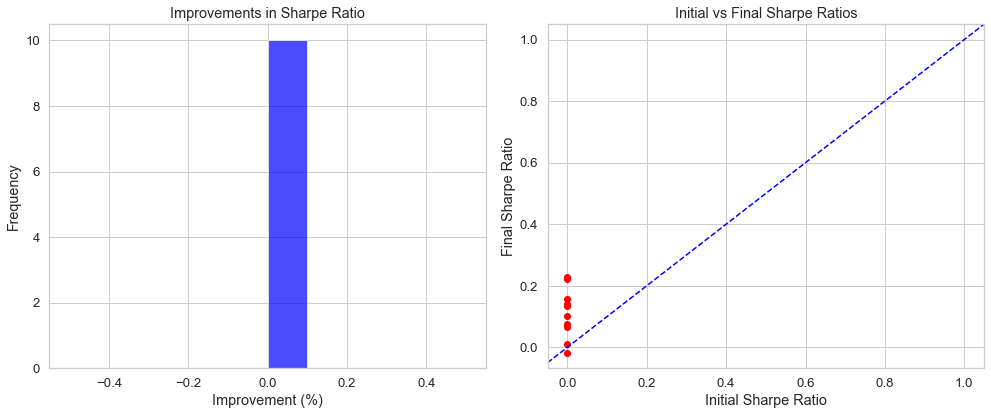

In [ ]:
import matplotlib.pyplot as plt

def plot_results(initial_sharpes, final_sharpes, improvements):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.hist(improvements, bins=10, color='blue', alpha=0.7)
    plt.title("Improvements in Sharpe Ratio")
    plt.xlabel("Improvement (%)")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.scatter(initial_sharpes, final_sharpes, color='red')
    plt.title("Initial vs Final Sharpe Ratios")
    plt.xlabel("Initial Sharpe Ratio")
    plt.ylabel("Final Sharpe Ratio")
    plt.axline([1, 1], slope=1, color="blue", linestyle="--")  

    plt.tight_layout()
    plt.show()

plot_results(initial_sharpes, final_sharpes, improvements)


In [ ]:
def evaluate_model2(env, model, print_each_quarter=True):
    obs = env.reset()
    done = False
    all_rewards = []
    counter = 0

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        all_rewards.append(reward)
        counter += 1

        # Only add to records after a few steps to allow the portfolio to 'warm up'
        if counter > 10: 
            all_rewards.append(reward)

        if done or (env.current_step + 1) % (len(env.df) // 4) == 0:
            current_date = env.df.index[env.current_step]
            if print_each_quarter or done:
                print(f"Quarter Ending {current_date.strftime('%Y-%m-%d')}: Sharpe Ratio: {info['sharpe_ratio']:.4f}")
                print(f"End of Quarter Portfolio Weights: {env.current_weights}")

    # Compute Sharpe ratios using all recorded rewards
    initial_sharpe = np.mean(all_rewards[:len(all_rewards)//4]) / np.std(all_rewards[:len(all_rewards)//4]) if len(all_rewards) > 1 else 0
    final_sharpe = np.mean(all_rewards) / np.std(all_rewards) if len(all_rewards) > 1 else 0
    improvement = ((final_sharpe - initial_sharpe) / abs(initial_sharpe) * 100) if initial_sharpe != 0 else 0

    print(f"Initial Sharpe Ratio: {initial_sharpe:.4f}, Final Sharpe Ratio: {final_sharpe:.4f}")
    print(f"Improvement in Sharpe Ratio: {improvement:.2f}%")

    return initial_sharpe, final_sharpe, improvement


In [ ]:
def get_final_portfolio_weights(env, model):
    obs = env.reset()
    done = False
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, _, done, _ = env.step(action)
    
    final_weights = env.current_weights
    stocks = env.df.columns
    portfolio_df = pd.DataFrame({'Stock': stocks, 'Weight': final_weights})
    return portfolio_df

final_portfolio_df = get_final_portfolio_weights(env, model)
final_portfolio_df

,Stock,Weight
0,AKAM,0.000000
1,ALL,0.044863
2,AMAT,0.023083
3,AWE,0.000000
4,BA,0.000000
...,...,...
61,TZH,0.000000
62,WFC,0.000000
63,WM,0.000000
64,WPO,0.000000


In [ ]:
def fetch_prices_from_wrds(stocks, date):
    formatted_stocks = ','.join([f"'{stock}'" for stock in stocks])
    query = f"""
    SELECT a.permno, b.ticker, a.prc AS price, b.caldt AS date
    FROM crsp.dsf AS a
    JOIN crsp.dsenames AS b ON a.permno = b.permno
    WHERE b.ticker IN ({formatted_stocks}) AND b.caldt = '{date}'
    AND b.namedt <= '{date}' AND '{date}' <= b.nameendt
    ORDER BY b.ticker;
    """
    try:
        prices = db.raw_sql(query)
        return prices
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on error

date_of_interest = '2023-09-30'
prices_df = fetch_prices_from_wrds(final_portfolio_df['Stock'], date_of_interest)
prices_df

An error occurred: (psycopg2.OperationalError) server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.

[SQL: 
    SELECT a.permno, b.ticker, a.prc AS price, b.caldt AS date
    FROM crsp.dsf AS a
    JOIN crsp.dsenames AS b ON a.permno = b.permno
    WHERE b.ticker IN ('AKAM','ALL','AMAT','AWE','BA','BEV','BLS','C','CCI','CEM','CMTN','COST','CRAY','DD','DELL','DIS','DNB','DOV','EIX','ELN','FALC','FCEL','FDC','FE','G','GL','GPS','HD','HRB','IBM','INTC','ITWO','JNY','JPM','LNC','MCD','MCO','MO','MRK','MTB','MXIM','NEOL','NHI','NXTL','ODP','OSI','PACW','PAYX','PFE','PVN','Q','QQQ','SFE','SGP','SILI','STI','T','TGT','TT','TWX','TXN','TZH','WFC','WM','WPO','XLNX') AND b.caldt = '2023-09-30'
    AND b.namedt <= '2023-09-30' AND '2023-09-30' <= b.nameendt
    ORDER BY b.ticker;

""


In [ ]:
def calculate_portfolio_return(portfolio_df, prices_df):
    # Merge the prices with the portfolio weights; make sure both 'ticker' and 'price' columns are correctly named
    merged_df = portfolio_df.merge(prices_df, left_on='Stock', right_on='ticker')
    merged_df['weighted_prc'] = merged_df['Weight'] * merged_df['price']  # Ensure the price column is named correctly

    total_portfolio_return = merged_df['weighted_prc'].sum()
    return total_portfolio_return

portfolio_return = calculate_portfolio_return(final_portfolio_df, prices_df)
print(f"Portfolio Return: {portfolio_return}")


KeyError: 'ticker'

In [ ]:
def fetch_sp500_price(date):
    # Correct table name and column names based on actual schema
    query = f"""
    SELECT caldt, spindx
    FROM crsp.dsp500 
    WHERE caldt = '{date}'
    """
    try:
        price = db.raw_sql(query)
        return price.iloc[0]['spindx'] if not price.empty else None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

sp500_price = fetch_sp500_price(date_of_interest)



In [ ]:
def calculate_portfolio_return(portfolio_df, prices_df):
    # Ensure that the price DataFrame is merged based on 'permno' if necessary or directly if tickers are used
    merged_df = portfolio_df.merge(prices_df, left_on='Stock', right_on='ticker')
    merged_df['weighted_prc'] = merged_df['Weight'] * merged_df['prc']
    
    total_portfolio_return = merged_df['weighted_prc'].sum()
    return total_portfolio_return

portfolio_return = calculate_portfolio_return(final_portfolio_df, prices_df)

# Assuming `sp500_price` is the return, not the price level; adjust as necessary based on the data specifics
performance_diff = (portfolio_return - sp500_price) / sp500_price * 100
print(f"Performance difference from S&P 500: {performance_diff:.2f}%")


KeyError: 'ticker'

In [ ]:
import numpy as np
from gym import Env
from gym.spaces import Box

class StockPortfolioEnv(Env):
    def __init__(self, df):
        super(StockPortfolioEnv, self).__init__()
        self.df = df
        self.n_assets = len(df.columns)
        self.action_space = Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(self.n_assets,), dtype=np.float32)
        self.initial_weights = np.zeros(self.n_assets)

    def reset(self):
        self.current_step = 0
        self.portfolio_returns = []
        self.current_weights = np.array([1.0 / self.n_assets] * self.n_assets)
        initial_obs = self.df.iloc[0].values
        return initial_obs.astype(np.float32)

    def step(self, action):
        self.current_weights = action / np.sum(action)  # Normalize the action to sum to 1
        current_returns = self.df.iloc[self.current_step].values
        portfolio_return = np.dot(current_returns, self.current_weights)
        self.portfolio_returns.append(portfolio_return)

        sharpe_ratio = self.calculate_sharpe_ratio()

        reward = sharpe_ratio
        self.current_step += 1
        done = self.current_step >= len(self.df) - 1
        next_obs = self.df.iloc[self.current_step % len(self.df)].values
        return next_obs.astype(np.float32), reward, done, {'sharpe_ratio': sharpe_ratio}

    def calculate_sharpe_ratio(self):
        if len(self.portfolio_returns) > 1:
            mean_returns = np.mean(self.portfolio_returns)
            std_returns = np.std(self.portfolio_returns)
            if std_returns > 0:
                return mean_returns / std_returns
            else:
                return 0
        return 0

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Portfolio Returns: {self.portfolio_returns[-1] if self.portfolio_returns else 'N/A'}")
        print(f'Current Weights: {self.current_weights}')


In [ ]:
from stable_baselines3 import PPO

env = StockPortfolioEnv(pivot_data)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=20000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/ishaanpoojari/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.01e+03 |
|    ep_rew_mean     | 2.69     |
| time/              |          |
|    fps             | 1178     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.01e+03    |
|    ep_rew_mean          | 2.55        |
| time/                   |             |
|    fps                  | 920         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017272515 |
|    clip_fraction        | 0.136       |
|    clip_range           | 0.2         |
|    entropy_loss         | -93.7       |
|    explained_variance   | 0.00971     |
|    learning_rate        | 0.

In [ ]:
def evaluate_model(env, model, num_steps):
    obs = env.reset()
    total_rewards = []
    portfolio_values = []
    
    for _ in range(num_steps):
        action, _states = model.predict(obs, deterministic=True)
        obs, rewards, done, info = env.step(action)
        total_rewards.append(rewards)
        portfolio_values.append(env.portfolio_returns[-1])
        if done:
            break

    mean_return = np.mean(portfolio_values)
    std_return = np.std(portfolio_values)
    sharpe_ratio = mean_return / std_return if std_return != 0 else 0

    return {
        'total_rewards': total_rewards,
        'mean_return': mean_return,
        'std_return': std_return,
        'sharpe_ratio': sharpe_ratio
    }

# Example usage with the already trained model and environment
evaluation_results = evaluate_model(env, model, len(env.df))
print(f"Mean Return: {evaluation_results['mean_return']}")
print(f"Standard Deviation of Returns: {evaluation_results['std_return']}")
print(f"Sharpe Ratio: {evaluation_results['sharpe_ratio']}")


Mean Return: 0.0013896710220028606
Standard Deviation of Returns: 0.012880643914193274
Sharpe Ratio: 0.10788831919121467
